## Optimisation de la droite tangente

In [108]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Définition des points

Dans l'absence de données réel, données aléatoirement générées

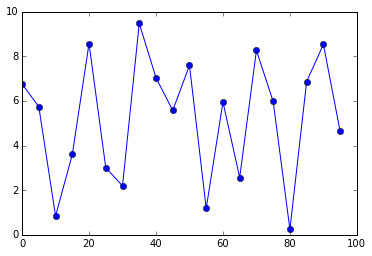

In [145]:
N = 20 #Nombre de points
L = 100 #Intervalle de variation de X
X = [i*L/N for i in range(0,N)] 
Y = np.random.uniform(0,10,N)
plt.plot(X,Y,"o-")

Calcul de la dérivée en chaque point

In [146]:
D = []
for i in range(1,N-1):
    D.append((Y[i+1]-Y[i-1])/(X[i+1]-X[i-1]))

Calcul de toutes les droites tangente en chaque point

In [147]:
def add_line(X,Y,D):
    lines = []
    for i in range(0,len(D)):
        Yd = [D[i]*(j-X[i+1])+Y[i+1] for j in X]
        lines.append(Yd)
    return lines

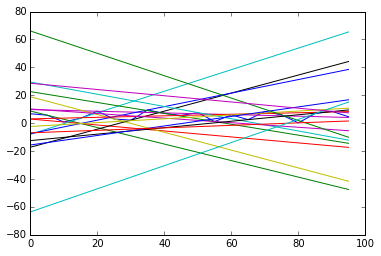

In [148]:
lines = add_line(X,Y,D)
plt.plot(X,Y)
for i in lines:
    plt.plot(X,i)

Filtre des droites sur deux conditions : ne pas croiser et minimiser l'écart à la courbe suivnat une distance quadratique

In [142]:
def filterCross(Y,Yd):
    Lnc = []
    for L in Yd:
        c = 0
        for i in range(1,len(Y)-1):
            if (L[i]-Y[i])*(L[i+1]-Y[i+1])<0 or (L[i-1]-Y[i-1])*(L[i+1]-Y[i+1])<0:
                c = 1
        if c == 0:
            Lnc.append(L)
    
    if len(Lnc) == 0:
        print("Pas de droite tangente non séquente")
        return []
    else:
        sort = []
        for l in Lnc:
            s = sum(((Y[i]-l[i])**2 for i in range(0,len(l))))
            sort.append([s,l])
        print("Solution trouvée")
        return sorted(sort)[0][1]

In [143]:
t = filterCross(Y,lines)

Solution trouvée


Résultat final 

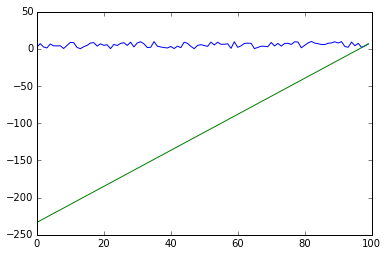

In [144]:
plt.plot(X,Y)
plt.plot(X,t)

In [106]:
np.polyfit(X,t,deg=1)

array([-0.07153349,  2.03778429])